In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import ast

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Get the data

In [2]:
# Load the saved array - gives Boost(i = sample point, z, k)
Bk_arr = np.load('Boost.npy')
print(Bk_arr.shape)

(50, 51, 768)


In [3]:
# extract data from text file - gives z and k arrays
txt_arr = np.loadtxt("z_k.txt")

z_arr = np.array(txt_arr.T[0][np.isfinite(txt_arr.T[0])])
k_arr = np.array(txt_arr.T[1])

print(z_arr.shape)
print(k_arr.shape)

(51,)
(768,)


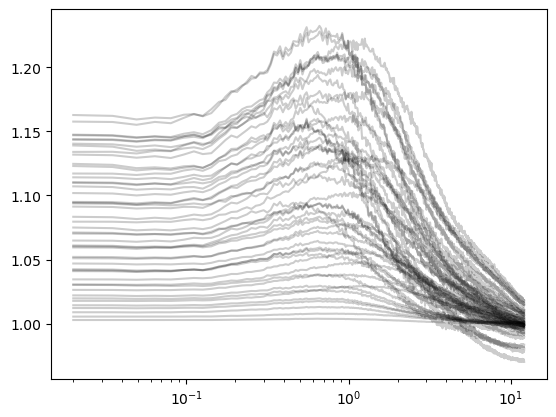

In [4]:
# Plot data

z_index = 12

plt.figure(32)
for sim_index in range(49):
    plt.plot(k_arr, Bk_arr[sim_index, z_index, :], 'k', alpha=0.2)
    
    
plt.xscale('log')
plt.show()
     


In [5]:
# Get the parameter - for now assume only one parameter, w_m
txt = "cosmo_newdesign"

hcube = np.loadtxt(txt).T
f_phi = hcube[4]
h = hcube[3]
Omega_m = hcube[0]
n_s = hcube[1]
A_s = hcube[2]

theta_1 = np.array([Omega_m,f_phi, h, n_s, A_s])



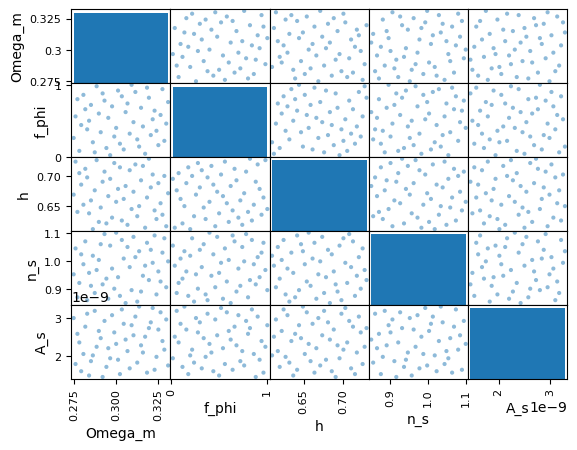

In [7]:
df_theta = pd.DataFrame(theta_1.T, columns=['Omega_m','f_phi', 'h', 'n_s', 'A_s'][:len(theta_1)])
pd.plotting.scatter_matrix(df_theta)
plt.show()


## standardization transformation

In [65]:
## TODO: understand if this is the transformation to do instead. Then, the Usvd should be used
# The mean and standard deviations are computed collectively for all the 50 cosmological models
"""
theta = (f_phi - np.mean(f_phi))/np.std(f_phi)
print(theta.shape)

# function of k, for now only z = 0
chi = np.ndarray.flatten(Bk_arr[:, 0, :])

print(np.all(chi[:768] == Bk_arr[0, 0, :])==True)

chi = (chi - np.mean(chi))/np.std(chi)

chi = chi.T.reshape((49, 768))

print(chi.shape)

# this plot shows the mean is at zero for all k
for i in range(len(k_arr)):
    plt.scatter(theta, chi.T[i], color="k", alpha = 0.1)
    plt.scatter(np.mean(theta), np.mean(chi.T[i]), color = "b")

plt.scatter(np.mean(theta), np.mean(chi), color = "r")

plt.xlabel(r"$\theta$ (normalized $\omega_m$)")
plt.ylabel(r"$\chi(k)$ (normalized $P(k, z=0)$)")

plt.show()
"""

'\ntheta = (f_phi - np.mean(f_phi))/np.std(f_phi)\nprint(theta.shape)\n\n# function of k, for now only z = 0\nchi = np.ndarray.flatten(Bk_arr[:, 0, :])\n\nprint(np.all(chi[:768] == Bk_arr[0, 0, :])==True)\n\nchi = (chi - np.mean(chi))/np.std(chi)\n\nchi = chi.T.reshape((49, 768))\n\nprint(chi.shape)\n\n# this plot shows the mean is at zero for all k\nfor i in range(len(k_arr)):\n    plt.scatter(theta, chi.T[i], color="k", alpha = 0.1)\n    plt.scatter(np.mean(theta), np.mean(chi.T[i]), color = "b")\n\nplt.scatter(np.mean(theta), np.mean(chi), color = "r")\n\nplt.xlabel(r"$\theta$ (normalized $\\omega_m$)")\nplt.ylabel(r"$\\chi(k)$ (normalized $P(k, z=0)$)")\n\nplt.show()\n'

(5, 50)
(50, 768)


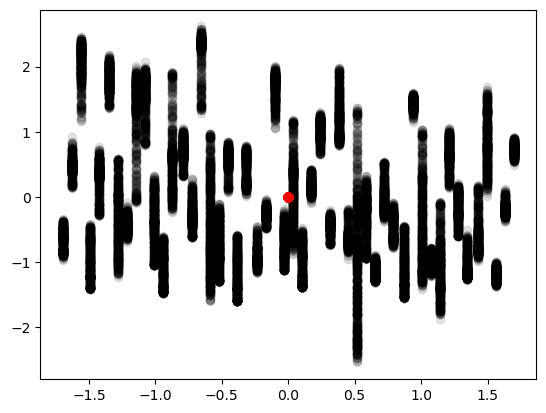

In [8]:
 # If the mean and std were computed for each cosmo model

theta = np.zeros((len(theta_1), len(theta_1[0])))
for i in range(len(theta)):
    theta[i] = (theta_1[i] - np.mean(theta_1[i]))/np.std(theta_1[i])

print(theta.shape)

# function of k, for now only z = 0
chi = (Bk_arr[:, 0, :] - np.mean(Bk_arr[:, 0, :], axis=0))/np.std(Bk_arr[:, 0, :], axis=0)

print(chi.shape)

# this plot shows the mean is at zero for all k
for i in range(len(k_arr)):
    plt.scatter(theta[0], chi.T[i], color="k", alpha = 0.1)
    plt.scatter(np.mean(theta[0]), np.mean(chi.T[i]), color = "r")

plt.show()

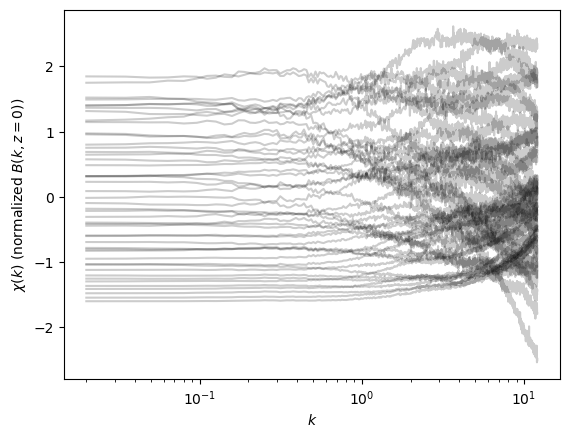

In [9]:
plt.figure(32)
for i in range(49):
    plt.plot(k_arr, chi[i], 'k', alpha=0.2)
    
plt.xscale('log')
plt.xlabel(r"$k$")
plt.ylabel(r"$\chi(k)$ (normalized $B(k, z=0)$)")

plt.show()

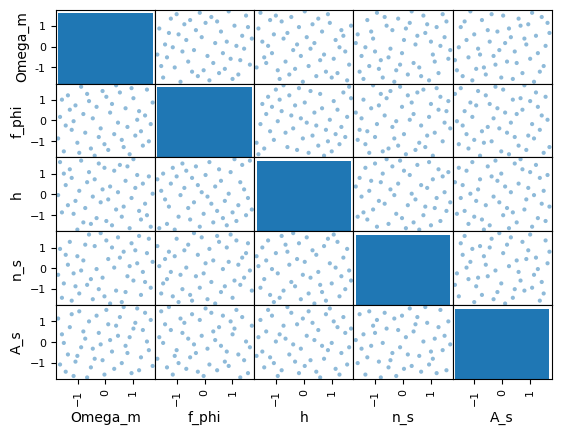

In [11]:
df_theta = pd.DataFrame(theta.T, columns=['Omega_m','f_phi', 'h', 'n_s', 'A_s'][:len(theta)])
pd.plotting.scatter_matrix(df_theta)
plt.show()


## Apply PCA

In [12]:
#TEST: Perform PCA with numpy.linalg.svd

Usvd, s, vh = np.linalg.svd(chi.T, full_matrices=True)

Usvd = Usvd.T

print("eigenvalues = ", s)

print("shape U = ", Usvd.shape)
print("shape sigma = ", s.shape)
print("shape V_transpose = ", vh.shape)

eigenvalues =  [1.86545243e+02 5.79263491e+01 9.14133242e+00 7.26958235e+00
 4.41688248e+00 3.56717423e+00 2.75949961e+00 2.53255766e+00
 2.18425349e+00 2.04180878e+00 1.98564620e+00 1.83027231e+00
 1.73082587e+00 1.69583718e+00 1.60438348e+00 1.56370275e+00
 1.53170626e+00 1.50487294e+00 1.46032865e+00 1.40490833e+00
 1.37533747e+00 1.31576504e+00 1.30104449e+00 1.27455742e+00
 1.25062263e+00 1.18906715e+00 1.18123835e+00 1.14272948e+00
 1.13420578e+00 1.09011731e+00 1.05775004e+00 1.01389633e+00
 9.87266808e-01 9.84848469e-01 9.39840968e-01 9.19620803e-01
 8.90082717e-01 8.81591842e-01 8.64666258e-01 8.27750997e-01
 7.89932480e-01 7.34019338e-01 6.73552407e-01 6.15197613e-01
 5.83065021e-01 5.28252883e-01 4.76119192e-01 3.16485874e-01
 1.98165334e-01 2.26102161e-12]
shape U =  (768, 768)
shape sigma =  (50,)
shape V_transpose =  (50, 50)


In [13]:
#TEST: Perform PCA with sklearn (Choose n_components to keep)
pca = PCA()

# Apply sklearn PCA method
sklearn_PCA = pca.fit(chi)

# Find vectors in direction of PCs (normalized ,positive)
PCAs_vects_sklearn = sklearn_PCA.components_
print("PCA eigenvector array size = ", PCAs_vects_sklearn.shape)

# Find eigenvalues for each PC
PCAs_eigenvals_sklearn = sklearn_PCA.singular_values_

print("eigenvalues = ", PCAs_eigenvals_sklearn)
#find PC vectors with eigenvalues as norm

Usklearn = np.matmul(np.diag(PCAs_eigenvals_sklearn), np.matrix(PCAs_vects_sklearn))

print("PCA norm eigenvector array size = ",Usklearn.shape)

PCA eigenvector array size =  (50, 768)
eigenvalues =  [1.86545243e+02 5.79263491e+01 9.14133242e+00 7.26958235e+00
 4.41688248e+00 3.56717423e+00 2.75949961e+00 2.53255766e+00
 2.18425349e+00 2.04180878e+00 1.98564620e+00 1.83027231e+00
 1.73082587e+00 1.69583718e+00 1.60438348e+00 1.56370275e+00
 1.53170626e+00 1.50487294e+00 1.46032865e+00 1.40490833e+00
 1.37533747e+00 1.31576504e+00 1.30104449e+00 1.27455742e+00
 1.25062263e+00 1.18906715e+00 1.18123835e+00 1.14272948e+00
 1.13420578e+00 1.09011731e+00 1.05775004e+00 1.01389633e+00
 9.87266808e-01 9.84848469e-01 9.39840968e-01 9.19620803e-01
 8.90082717e-01 8.81591842e-01 8.64666258e-01 8.27750997e-01
 7.89932480e-01 7.34019338e-01 6.73552407e-01 6.15197613e-01
 5.83065021e-01 5.28252883e-01 4.76119192e-01 3.16485874e-01
 1.98165334e-01 8.28427297e-14]
PCA norm eigenvector array size =  (50, 768)


[0.0, 0.9062272868867324, 0.9936091076340571, 0.9957852523838359, 0.9971614718515105]


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

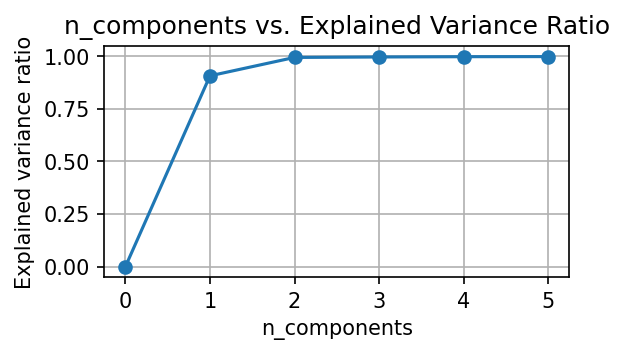

In [19]:
nums = np.arange(6)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(chi)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
    
idx = np.argmin(np.abs(var_ratio - np.min([i for i in var_ratio if (i - 0.98) >= 0])))

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
print(var_ratio[:5])

plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

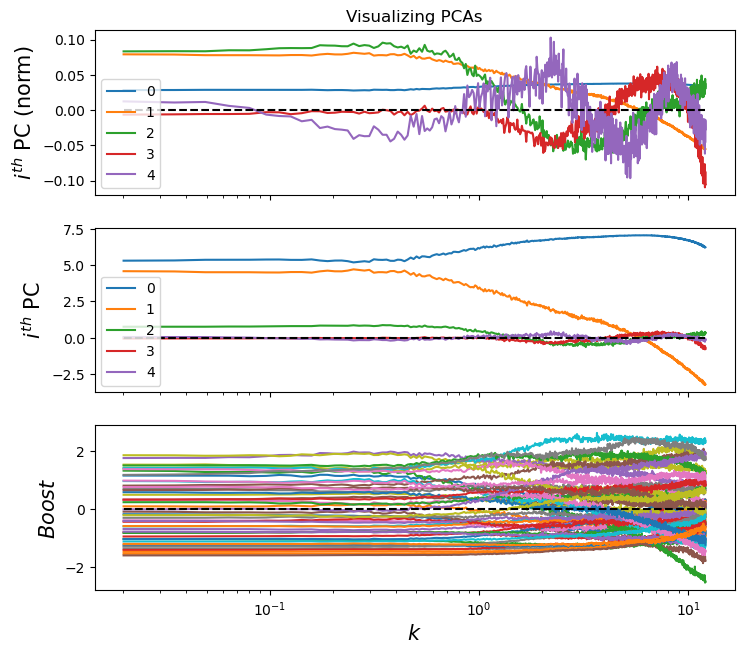

In [34]:
"""Plot PCA components as a function of k"""

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False,figsize=(8, 7))

for i in range(5):
    #ax1.plot(k_arr, np.matmul(np.diag(s), Usvd[:50])[i])
    ax1.plot(k_arr, np.array(Usklearn[i])[0]/PCAs_eigenvals_sklearn[i], label=i)
    
ax1.plot(k_arr, np.zeros(len(k_arr)), "k--")
ax1.set_ylabel(r'$i^{th}$ PC (norm)', size = 15)
ax1.set_title("Visualizing PCAs")

ax1.legend()

for i in range(5):
    #ax1.plot(k_arr, np.matmul(np.diag(s), Usvd[:50])[i])
    ax2.plot(k_arr, np.array(Usklearn[i])[0], label=i)
    
ax2.plot(k_arr, np.zeros(len(k_arr)), "k--")

ax2.legend()


ax2.set_ylabel(r'$i^{th}$ PC', size = 15)
plt.xscale("log")


for i in range(49):
    ax3.plot(k_arr,chi[i])

ax3.plot(k_arr, np.zeros(len(k_arr)), "k--")

ax3.set_ylabel(r'$Boost$', size = 15)
ax3.set_xlabel(r'$k$', size = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)

ax1.set_xscale("log")


#plt.savefig('PCcompare.pdf' , bbox_inches='tight')
plt.show()


In [168]:
# Find the projections we want to emulate

w_theta = np.matmul(chi, Usvd[:idx+1].T)
print(w_theta.shape)

(49, 3)


/home/c2042999/anaconda3/envs/DESC_Pittsprint/lib/python3.9/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


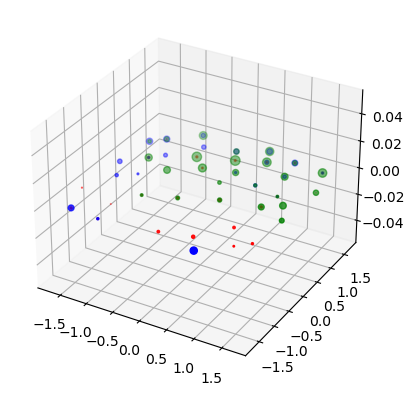

In [169]:
# Plot the projections
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.scatter(theta[0], theta[1], w_theta.T[2], marker="o", color="r")
plt.scatter(theta[0], theta[1], w_theta.T[1], marker="o", color="b")
plt.scatter(theta[0], theta[1], w_theta.T[0], marker="o", color="g")

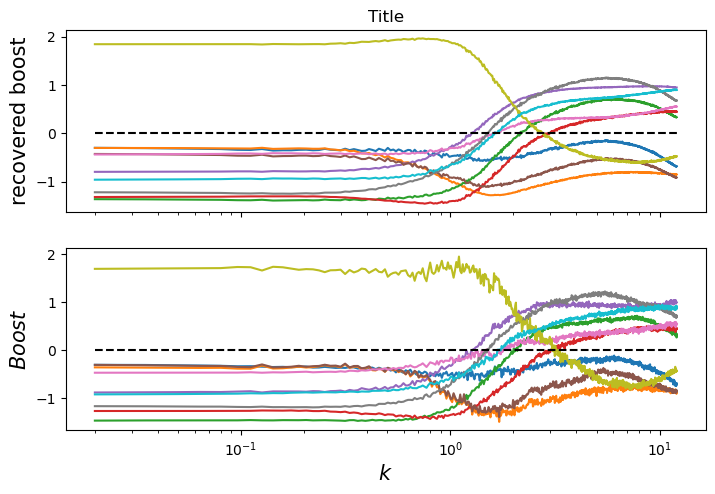

In [170]:
"""Recover boosts from PCA components"""

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False,figsize=(8, 5))

for i in range(10):
    ax1.plot(k_arr, np.matmul(w_theta, Usvd[:idx+1])[i])
    
ax1.plot(k_arr, np.zeros(len(k_arr)), "k--")


ax1.set_ylabel(r'recovered boost', size = 15)
ax1.set_title("Title")
plt.xscale("log")


for i in range(10):
    ax2.plot(k_arr,chi[i])

ax2.plot(k_arr, np.zeros(len(k_arr)), "k--")
    

ax2.set_ylabel(r'$Boost$', size = 15)
ax2.set_xlabel(r'$k$', size = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)


plt.show()


## Gaussian processes

In [171]:
# Define the Squared Exponential (SE) covariance function

def SE_kernel(xa, xb, standard_dev, lengthscale):
    
    """Exponentiated quadratic
    xa --> (ma, n), where ma is the number of gaussian vectors (n points in function)
                    and n is the dimension of the vector theta
    xb --> (mb, n)
    standard_dev --> standard deviation of function
    lengthscale --> characteristic length scale"""
    
    # Squared of Euclidian distance [Dist_{a,b} = xa - xb]
    
    
    sq_norm = -0.5 * (scipy.spatial.distance.cdist(xa, xb, 'euclidean') **2 / lengthscale**2)
    return standard_dev**2 * np.exp(sq_norm)

In [172]:
# EXAMPLE: Show the prior covariance. Remember this has mean f(x) = 0

# Sample from the Gaussian process distribution
n_of_samples = 5  # number of points in each function
sigma = 4.0
ell = 0.25
sigma_noise = 0.1

# Space to sample

X_1D = np.linspace(-2,2,n_of_samples)
X_mesh = np.array(np.meshgrid(*np.linspace(ast.literal_eval('-2,'*len(theta)),\
                                           ast.literal_eval('2,'*len(theta)),n_of_samples).T))
X = np.array(np.meshgrid(*np.linspace(ast.literal_eval('-2,'*len(theta)),ast.literal_eval('2,'*len(theta)),\
                                      n_of_samples).T)).reshape(len(theta),n_of_samples**len(theta)).T
cov = SE_kernel(X, X, sigma, ell)  # Kernel of data points

print(X_1D.shape)
print(X_mesh.shape)
print(X.shape)
print(cov.shape)

(5,)
(4, 5, 5, 5, 5)
(625, 4)
(625, 625)


In [173]:
# PLOT 1: plot of x_0 vs. x_0' for x_1' = x_1 + k*dx_1, where k increases as you go up or right from the bottom corner
"""
f, ax = plt.subplots(n_of_samples,n_of_samples, sharex=True, sharey=True,figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})


for i in range(n_of_samples):
    for j in range(n_of_samples):
        
        X_marginal_1_i = X.T[0].reshape(n_of_samples*n_of_samples, 1)[n_of_samples*i:n_of_samples*(i+1)]
        X_marginal_1_j = X.T[0].reshape(n_of_samples*n_of_samples, 1)[n_of_samples*j:n_of_samples*(j+1)]

        cov_marginal_1 = cov[n_of_samples*i:n_of_samples*(i+1),n_of_samples*j:n_of_samples*(j+1)]
        
        XX, YY = np.meshgrid(X_marginal_1_i, X_marginal_1_j)

        ax[n_of_samples-1-i][j].pcolormesh(XX,YY,cov_marginal_1, vmin = 0, vmax=1)

for b in ax:
    for a in b:
        a.set_xticklabels([])
        a.set_yticklabels([])
"""

"\nf, ax = plt.subplots(n_of_samples,n_of_samples, sharex=True, sharey=True,figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})\n\n\nfor i in range(n_of_samples):\n    for j in range(n_of_samples):\n        \n        X_marginal_1_i = X.T[0].reshape(n_of_samples*n_of_samples, 1)[n_of_samples*i:n_of_samples*(i+1)]\n        X_marginal_1_j = X.T[0].reshape(n_of_samples*n_of_samples, 1)[n_of_samples*j:n_of_samples*(j+1)]\n\n        cov_marginal_1 = cov[n_of_samples*i:n_of_samples*(i+1),n_of_samples*j:n_of_samples*(j+1)]\n        \n        XX, YY = np.meshgrid(X_marginal_1_i, X_marginal_1_j)\n\n        ax[n_of_samples-1-i][j].pcolormesh(XX,YY,cov_marginal_1, vmin = 0, vmax=1)\n\nfor b in ax:\n    for a in b:\n        a.set_xticklabels([])\n        a.set_yticklabels([])\n"

In [174]:
# EXAMPLE: Sample some functions from Gaussian process distribution
n_of_functions = 5  # Number of functions to sample

# Draw samples from the prior at our data points
# Assume mean of 0 for prior
ys = np.random.multivariate_normal(
    mean=np.zeros(n_of_samples**len(theta)), cov=cov, 
    size=n_of_functions)

print(ys.shape)

(5, 625)


(5, 5, 5, 5) (5, 5, 5, 5)


Text(0.5, 0, 'x_0')

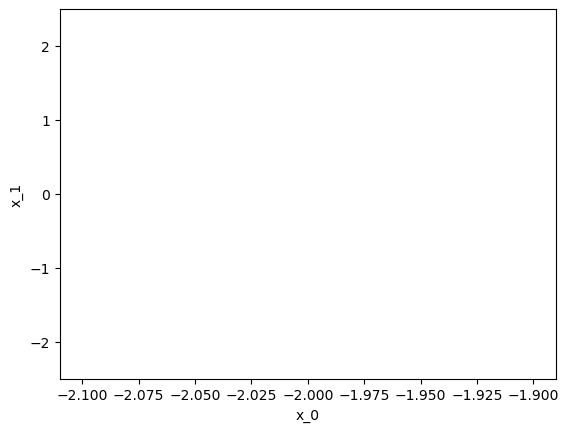

In [175]:
# EXAMPLE: Plot the sampled functions in 2D

print(X_mesh[0].shape, X_mesh[1].shape)

## Looks at 2 dims only
plt.pcolormesh(X_mesh[0].flatten()[:n_of_samples**2].reshape(n_of_samples,n_of_samples),\
               X_mesh[-1].flatten()[:n_of_samples**2].reshape(n_of_samples,n_of_samples),\
               ys[0].flatten()[:n_of_samples**2].reshape(n_of_samples,n_of_samples))


#plt.fill_between(X.flatten(), -sigma, sigma, alpha=0.2)

plt.ylabel("x_1")
plt.xlabel("x_0")

Text(0.5, 0, 'x_0')

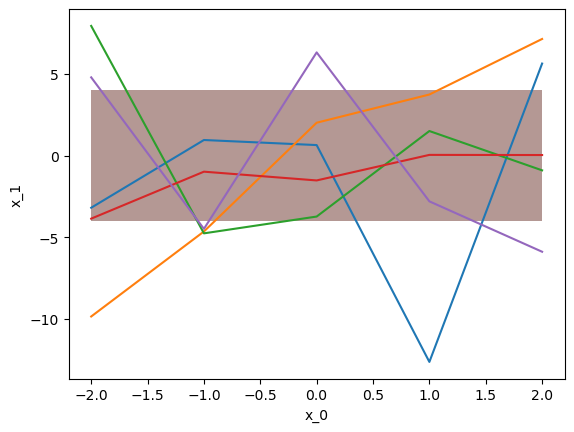

In [176]:
# EXAMPLE: Plot the sampled functions marginalized over 1D

    
for i in range(len(ys)):
    plt.plot(X_1D, ys[i].flatten()[:n_of_samples**2].reshape(n_of_samples,n_of_samples)[1])
    plt.fill_between(X_1D, -sigma, sigma, alpha=0.2)

plt.ylabel("x_1")
plt.xlabel("x_0")

In [177]:
# EXAMPLE: To Do - find corner plot showing marginal Gaussians, dimensions (n x n)


In [178]:
# Gaussian process posterior
def GP(X1, y1, X2, kernel_func):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1), 
    and the prior kernel function.
    """
    # Kernel of the observations
    K11 = kernel_func(X1, X1)
    # Kernel of observations vs to-predict
    K12 = kernel_func(X1, X2)
    # Solve - returns (K11^-1 * K12)^T, assuming positive definite solutions
    solved = scipy.linalg.solve(K11, K12, assume_a='pos').T
    # Compute posterior mean
    mean2 = solved @ y1
    # Compute the posterior covariance
    K22 = kernel_func(X2, X2)
    K2 = K22 - (solved @ K12)
    return mean2, K2  # mean, covariance

In [179]:
# Gaussian process posterior with noisy obeservations
def GP_noise(X1, y1, X2, kernel_func, sigma_noise):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the noisy observations 
    (y1, X1), and the prior kernel function.
    """
    # Kernel of the noisy observations
    K11 = kernel_func(X1, X1) + ((sigma_noise ** 2) * np.eye(n1))
    # Kernel of observations vs to-predict
    K12 = kernel_func(X1, X2)
    # Solve
    solved = scipy.linalg.solve(K11, K12, assume_a='pos').T
    # Compute posterior mean
    mean2 = solved @ y1
    # Compute the posterior covariance
    K22 = kernel_func(X2, X2)
    K2 = K22 - (solved @ K12)
    return mean2, K2  # mean, covariance

In [180]:
# Compute the posterior mean and covariance

n1 = len(theta[0])  # Number of points to condition on (training points)
n2 = 10  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior


# Sample observations (X1, y1) on the function
X1 = theta.T

y1 = w_theta.T[0].reshape(-1, 1)
y1_2 = w_theta.T[1].reshape(-1, 1)
y1_3 = w_theta.T[2].reshape(-1, 1)

# Predict points at uniform spacing to capture function
X2_1D = np.linspace(-2.5,2,n2)
X2_ND = np.linspace(ast.literal_eval('-2.5,'*len(theta)),\
                                           ast.literal_eval('2,'*len(theta)),n2).T
X2_mesh = np.array(np.meshgrid(*np.linspace(ast.literal_eval('-2.5,'*len(theta)),\
                                           ast.literal_eval('2,'*len(theta)),n2).T))

X2 = np.array(np.meshgrid(*np.linspace(ast.literal_eval('-2.5,'*len(theta)),ast.literal_eval('2,'*len(theta)),\
                                      n2).T)).reshape(len(theta),n2**len(theta)).T
# Compute posterior mean and covariance
mean2, variance2 = GP_noise(X1, y1, X2, lambda x, y: SE_kernel(x, y, sigma, ell), 1)
mean2_2, variance2_2 = GP_noise(X1, y1_2, X2, lambda x, y: SE_kernel(x, y, sigma, ell), 1)
mean2_3, variance2_3 = GP_noise(X1, y1_3, X2, lambda x, y: SE_kernel(x, y, sigma, ell), 1)

# Compute the standard deviation at the test points to be plotted
stand_dev2 = np.sqrt(np.diag(variance2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=mean2.T[0], cov=variance2, size=ny)

In [181]:
print(X2.shape)
print(y2.shape)
print(mean2.shape)
print(mean2_2.shape)
print(X2_ND.shape)

(10000, 4)
(5, 10000)
(10000, 1)
(10000, 1)
(4, 10)


Text(0.5, 0, 'x_0')

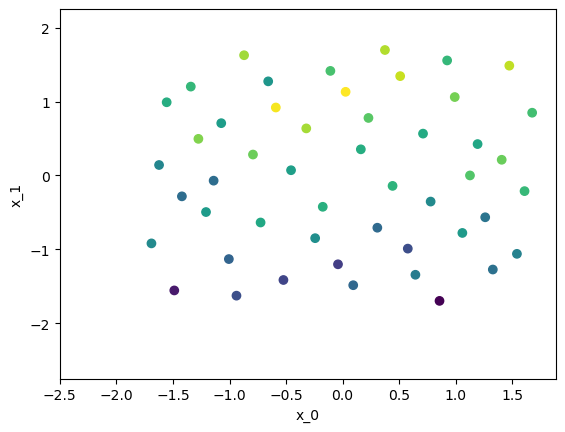

In [182]:

cmap = matplotlib.colormaps['viridis']
max_val = max(np.max(mean2.flatten()[:n_of_samples**2].reshape(n_of_samples,n_of_samples)), np.max(y1))
min_val = min(np.min(mean2.flatten()[:n_of_samples**2].reshape(n_of_samples,n_of_samples)), np.min(y1))

frac = (y1 - min_val)/(max_val-min_val)

plt.pcolormesh(X2_mesh[0].flatten()[:n2**2].reshape(n2,n2),X2_mesh[-1].flatten()[:n2**2].reshape(n2,n2) , mean2.flatten()[:n2**2].reshape(n2,n2), cmap='viridis', 
               vmax = max_val,vmin = min_val)

plt.scatter(theta[0], theta[1] , c = cmap(frac) , edgecolor=None)

#plt.fill_between(X.flatten(), -sigma, sigma, alpha=0.2)

plt.ylabel("x_1")
plt.xlabel("x_0")

In [183]:
# EXAMPLE: plots for some sample posterior functions
"""
for i in range(len(y2)):
    plt.plot(X2.T[0], y2[i])
    
plt.plot(X2.T[0],mean2, "k--")
plt.fill_between(X2.T[0], mean2.T[0]-stand_dev2, mean2.T[0]+stand_dev2, alpha=0.2)

plt.scatter(X1.T[0],y1)
"""

'\nfor i in range(len(y2)):\n    plt.plot(X2.T[0], y2[i])\n    \nplt.plot(X2.T[0],mean2, "k--")\nplt.fill_between(X2.T[0], mean2.T[0]-stand_dev2, mean2.T[0]+stand_dev2, alpha=0.2)\n\nplt.scatter(X1.T[0],y1)\n'

In [184]:
# EXAMPLE: Show the posterior covariance.

# PLOT 1: plot of x_0 vs. x_0' for x_1' = x_1 + k*dx_1, where k increases as you go up or right from the bottom corner
"""
f, ax = plt.subplots(n2,n2, sharex=True, sharey=True,figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})

X = np.array(np.meshgrid(np.linspace(-2,2,n2),np.linspace(-2,2,n2))).reshape(2,n2*n2).T


for i in range(n2):
    for j in range(n2):
        
        X_marginal_1_i = X.T[0].reshape(n2*n2, 1)[n2*i:n2*(i+1)]
        X_marginal_1_j = X.T[0].reshape(n2*n2, 1)[n2*j:n2*(j+1)]

        cov_marginal_1 = variance2[n2*i:n2*(i+1),n2*j:n2*(j+1)]
        
        XX, YY = np.meshgrid(X_marginal_1_i, X_marginal_1_j)

        ax[n2-1-i][j].pcolormesh(XX,YY,cov_marginal_1, vmin = 0, vmax=1)

for b in ax:
    for a in b:
        a.set_xticklabels([])
        a.set_yticklabels([])
        
#cbar = fig.colorbar(im)
#cbar.ax[0][0].set_ylabel(r"Kernel $K(x,x')$", rotation=-90, va="bottom")

"""

'\nf, ax = plt.subplots(n2,n2, sharex=True, sharey=True,figsize=(10,10), gridspec_kw = {\'wspace\':0, \'hspace\':0})\n\nX = np.array(np.meshgrid(np.linspace(-2,2,n2),np.linspace(-2,2,n2))).reshape(2,n2*n2).T\n\n\nfor i in range(n2):\n    for j in range(n2):\n        \n        X_marginal_1_i = X.T[0].reshape(n2*n2, 1)[n2*i:n2*(i+1)]\n        X_marginal_1_j = X.T[0].reshape(n2*n2, 1)[n2*j:n2*(j+1)]\n\n        cov_marginal_1 = variance2[n2*i:n2*(i+1),n2*j:n2*(j+1)]\n        \n        XX, YY = np.meshgrid(X_marginal_1_i, X_marginal_1_j)\n\n        ax[n2-1-i][j].pcolormesh(XX,YY,cov_marginal_1, vmin = 0, vmax=1)\n\nfor b in ax:\n    for a in b:\n        a.set_xticklabels([])\n        a.set_yticklabels([])\n        \n#cbar = fig.colorbar(im)\n#cbar.ax[0][0].set_ylabel(r"Kernel $K(x,x\')$", rotation=-90, va="bottom")\n\n'

In [185]:
## Recover PCAs

theta_emu = X2_ND
w_theta_emu_1 = mean2.reshape(np.ones(len(theta), dtype=int)*int(n2)).transpose(np.append([1,0],np.arange(2,len(theta))))
w_theta_emu_2 = mean2_2.reshape(np.ones(len(theta), dtype=int)*int(n2)).transpose(np.append([1,0],np.arange(2,len(theta))))
w_theta_emu_3 = mean2_3.reshape(np.ones(len(theta), dtype=int)*int(n2)).transpose(np.append([1,0],np.arange(2,len(theta))))

print(theta_emu.shape)
print(w_theta_emu_1.shape)

def f_w_theta1(theta_funct):
    return scipy.interpolate.interpn(theta_emu, w_theta_emu_1, theta_funct)
def f_w_theta2(theta_funct):
    return scipy.interpolate.interpn(theta_emu, w_theta_emu_2, theta_funct)
def f_w_theta3(theta_funct):
    return scipy.interpolate.interpn(theta_emu, w_theta_emu_3, theta_funct)



(4, 10)
(10, 10, 10, 10)


In [186]:
#TODO
"""
x,y = np.meshgrid(np.linspace(-2.5,2,n2),np.linspace(-2.5,2,n2))

cmap = matplotlib.colormaps['viridis']
max_val = max(np.max(mean2.reshape(n2,n2)), np.max(y1))
min_val = min(np.min(mean2.reshape(n2,n2)), np.min(y1))

frac = np.zeros(len(theta[0]))
for i in range(len(theta[0])):
    frac[i] = (f_w_theta1(theta[:,i]) - min_val)/(max_val-min_val)

#plt.pcolormesh(x,y , f_w_theta1(np.array([np.linspace(-2,2,n2),np.linspace(-2,2,n2)]).T), cmap='viridis', 
#               vmax = max_val,vmin = min_val)
plt.pcolormesh(X2_mesh[0],X2_mesh[1] , mean2.flatten()[:n2**len(theta)].reshape(n2,n2), cmap='viridis', 
               vmax = max_val,vmin = min_val)

print(f_w_theta1(theta.T).shape)
plt.scatter(theta[0], theta[1],c = cmap(frac) , edgecolor="black")

#plt.fill_between(X.flatten(), -sigma, sigma, alpha=0.2)

plt.ylabel("x_1")
plt.xlabel("x_0")
"""

'\nx,y = np.meshgrid(np.linspace(-2.5,2,n2),np.linspace(-2.5,2,n2))\n\ncmap = matplotlib.colormaps[\'viridis\']\nmax_val = max(np.max(mean2.reshape(n2,n2)), np.max(y1))\nmin_val = min(np.min(mean2.reshape(n2,n2)), np.min(y1))\n\nfrac = np.zeros(len(theta[0]))\nfor i in range(len(theta[0])):\n    frac[i] = (f_w_theta1(theta[:,i]) - min_val)/(max_val-min_val)\n\n#plt.pcolormesh(x,y , f_w_theta1(np.array([np.linspace(-2,2,n2),np.linspace(-2,2,n2)]).T), cmap=\'viridis\', \n#               vmax = max_val,vmin = min_val)\nplt.pcolormesh(X2_mesh[0],X2_mesh[1] , mean2.flatten()[:n2**len(theta)].reshape(n2,n2), cmap=\'viridis\', \n               vmax = max_val,vmin = min_val)\n\nprint(f_w_theta1(theta.T).shape)\nplt.scatter(theta[0], theta[1],c = cmap(frac) , edgecolor="black")\n\n#plt.fill_between(X.flatten(), -sigma, sigma, alpha=0.2)\n\nplt.ylabel("x_1")\nplt.xlabel("x_0")\n'

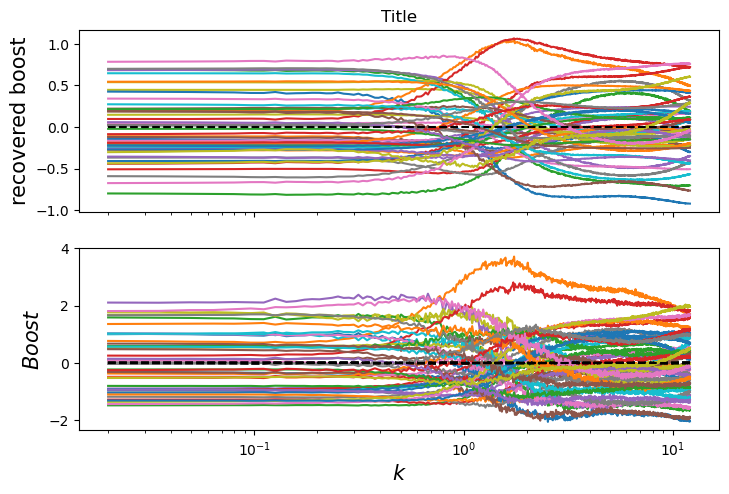

In [187]:
"""Recover boosts from PCA components"""

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False,figsize=(8, 5))

w_theta_emu_arr = np.zeros((3, len(theta[0])))

for i in range(len(theta[0])):
    w_theta_emu_arr[0][i] = f_w_theta1(theta[:,i])
    w_theta_emu_arr[1][i] = f_w_theta2(theta[:,i])
    w_theta_emu_arr[2][i] = f_w_theta3(theta[:,i])
    
    
for i in range(49):
    ax1.plot(k_arr, np.matmul(w_theta_emu_arr.T, Usvd[:idx+1])[i])
    
ax1.plot(k_arr, np.zeros(len(k_arr)), "k--")


ax1.set_ylabel(r'recovered boost', size = 15)
ax1.set_title("Title")
plt.xscale("log")


for i in range(49):
    ax2.plot(k_arr,chi[i])
    ax2.plot(k_arr, np.zeros(len(k_arr)), "k--")
    

ax2.set_ylabel(r'$Boost$', size = 15)
ax2.set_xlabel(r'$k$', size = 15)


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)


plt.show()


In [188]:
## Undo standardization trasformation

In [189]:
theta_emu = np.zeros((len(theta_1), len(theta_1[0])))
chi_emu = np.zeros(len(chi))

for i in range(len(theta)):
    theta_emu[i] = (theta[i]*np.std(theta_1[i]) + np.mean(theta_1[i]))

print(theta.shape)


chi_emu = (np.matmul(w_theta_emu_arr.T, Usvd[:idx+1])*np.std(Bk_arr[:, 0, :], axis=0) + np.mean(Bk_arr[:, 0, :], axis=0))


(4, 49)


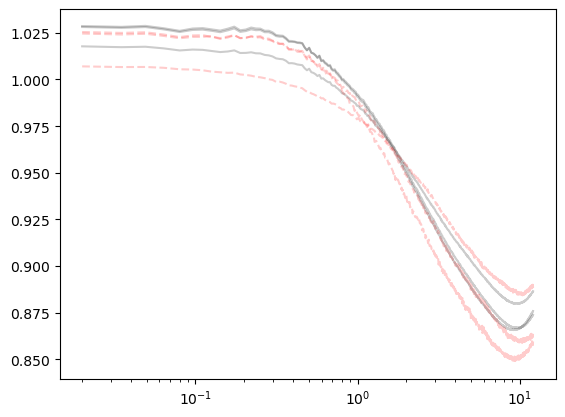

In [190]:
for sim_index in range(3):
    plt.plot(k_arr, chi_emu[sim_index], 'k', alpha=0.2)
    plt.plot(k_arr, Bk_arr[sim_index, 0, :], 'r--', alpha=0.2)

plt.xscale("log")